In [289]:
import statistics
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [341]:
def score_histogram(data_slice, title):
    score_counts = []
    for score in range(0, 7):
        length = len(data_slice[data_slice['score'] - 1 == score])
        score_counts.append(length)
    plt.bar(range(1, 8), score_counts)
    plt.xticks(range(1, 8))
    plt.xlabel('ocena')
    plt.ylabel('liczność')
    plt.title(title)
    #plt.savefig('ocena_histogram.png', dpi=400, format='png')
    plt.show()

In [343]:
data = pd.read_csv('data.csv')
participants = pd.read_csv('participants.csv')

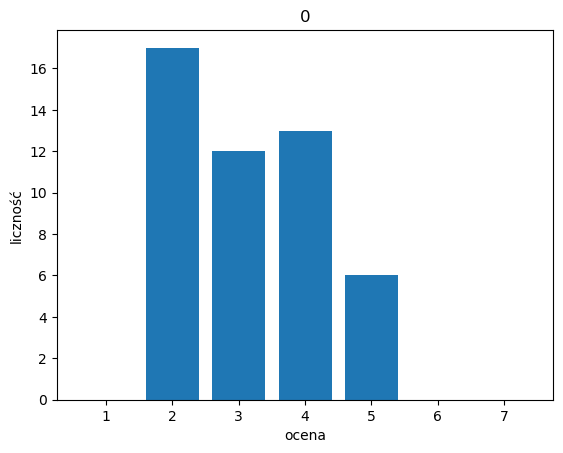

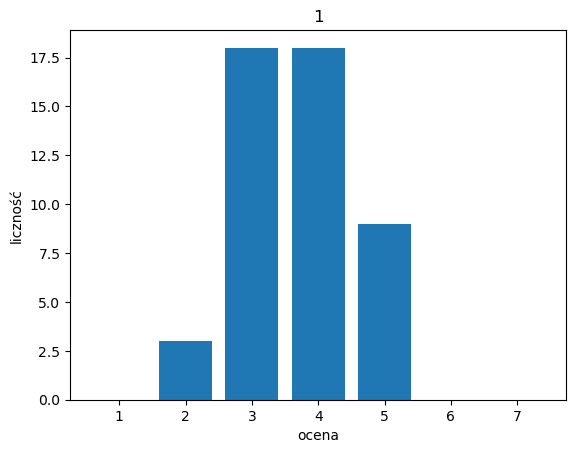

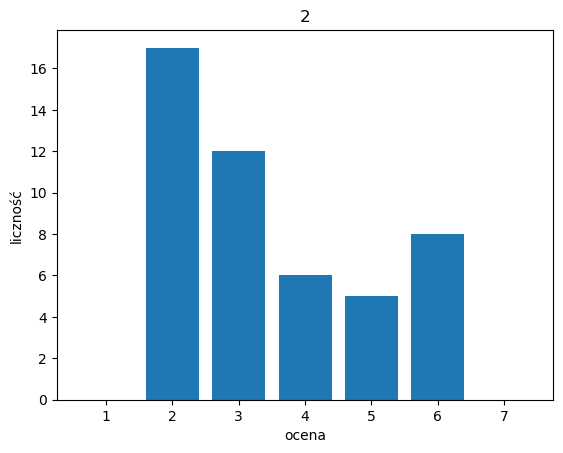

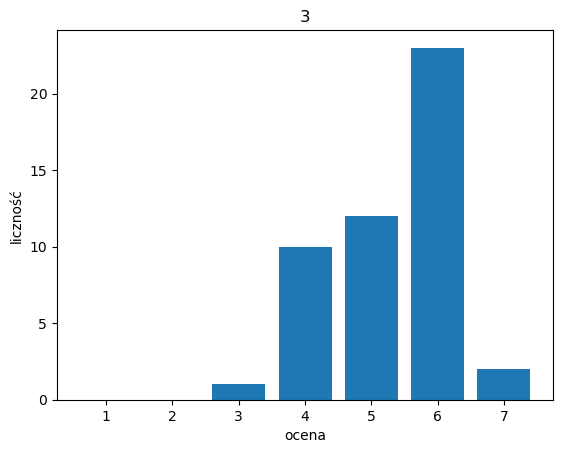

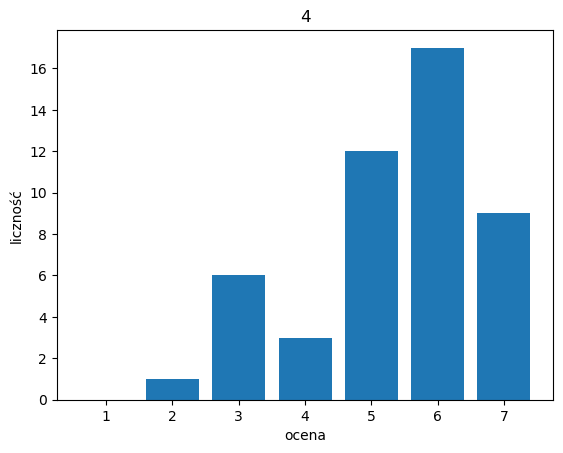

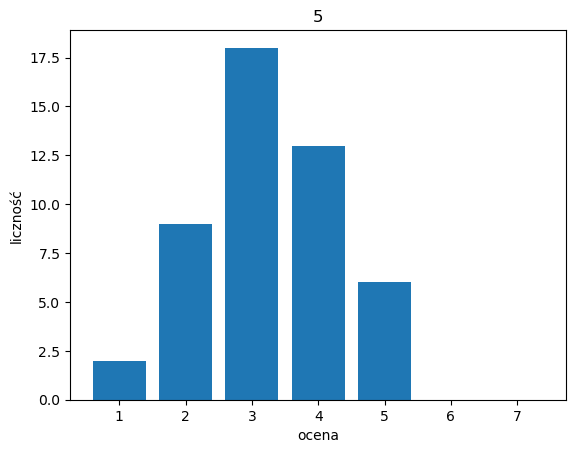

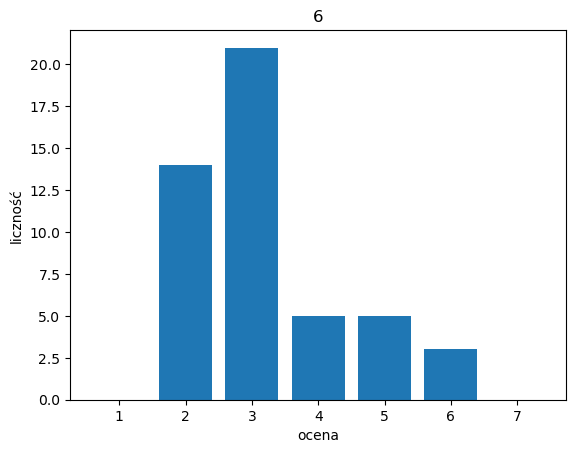

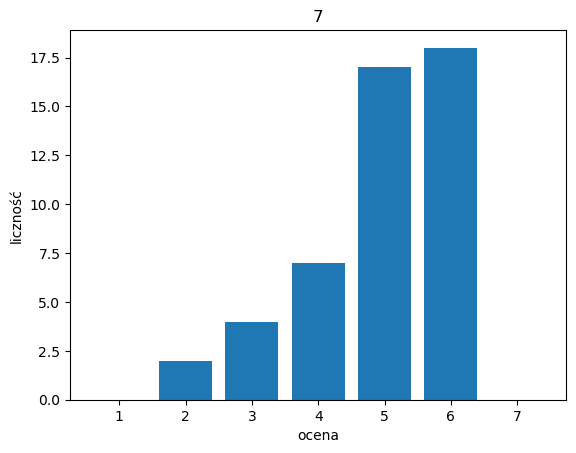

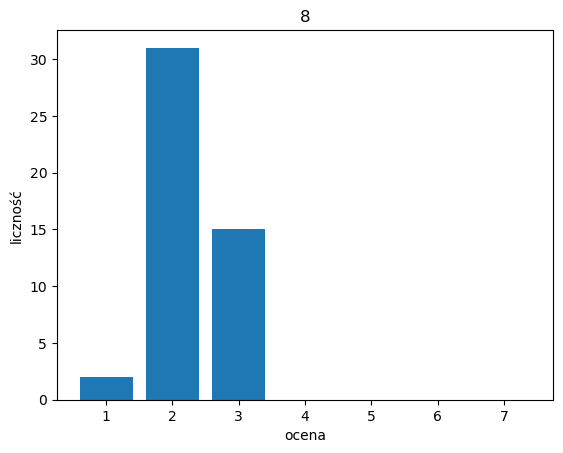

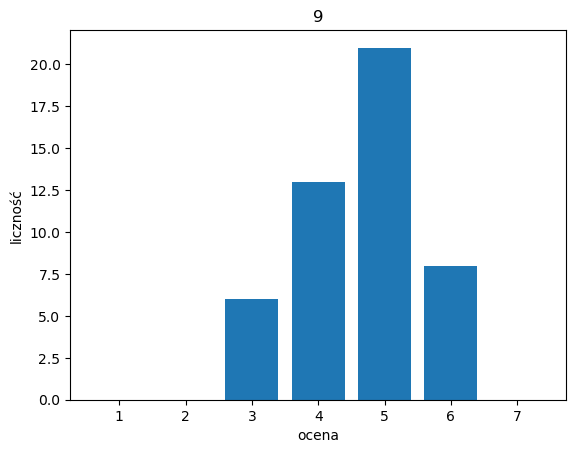

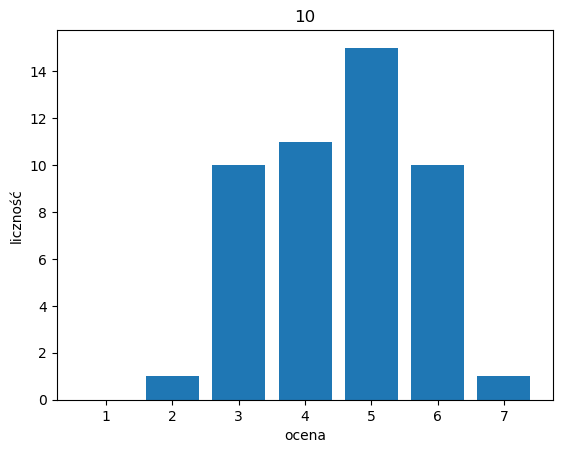

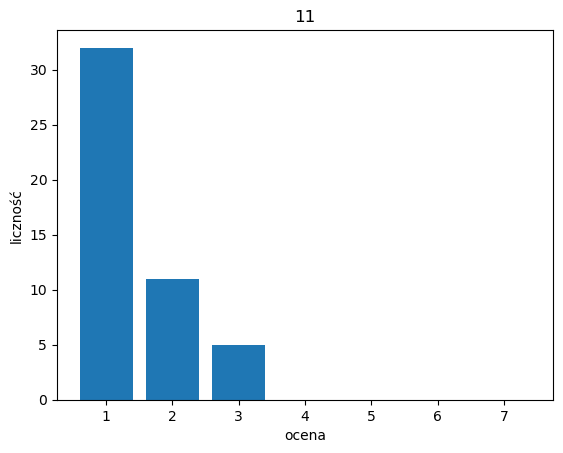

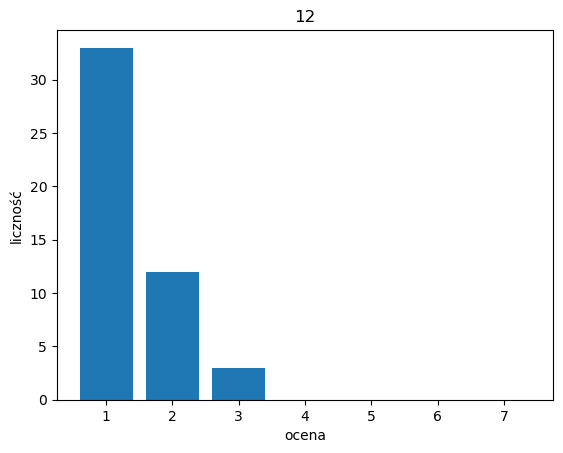

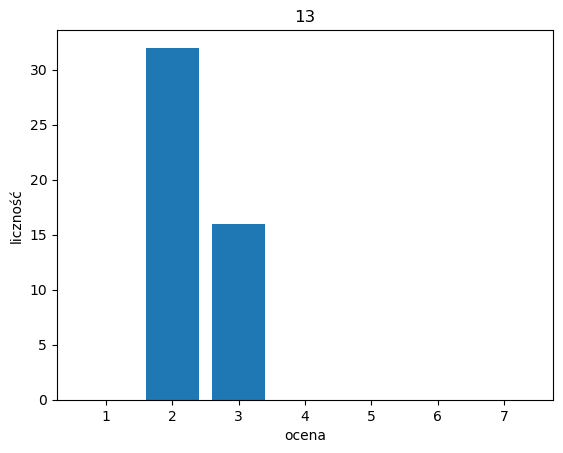

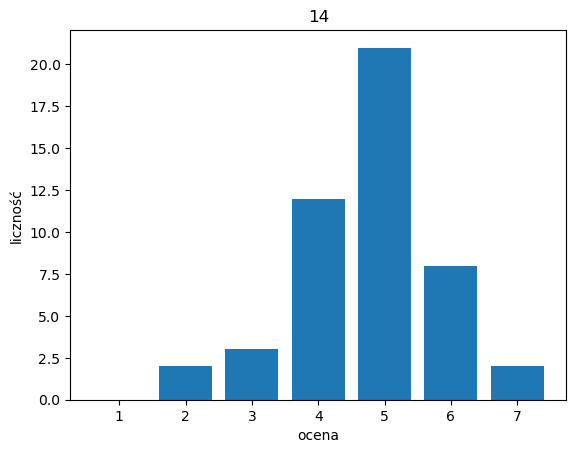

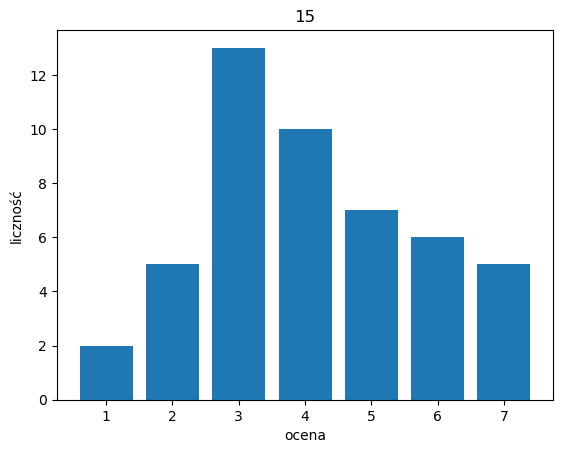

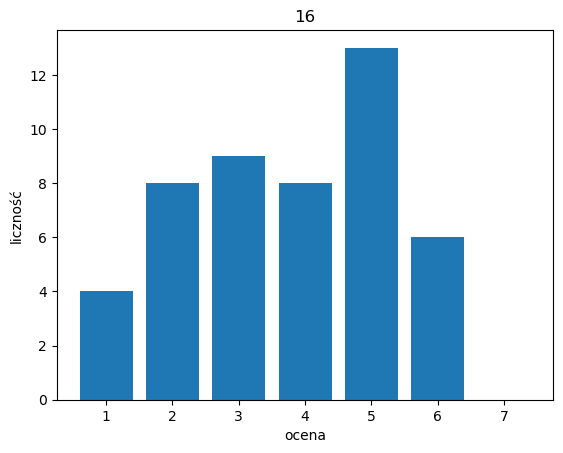

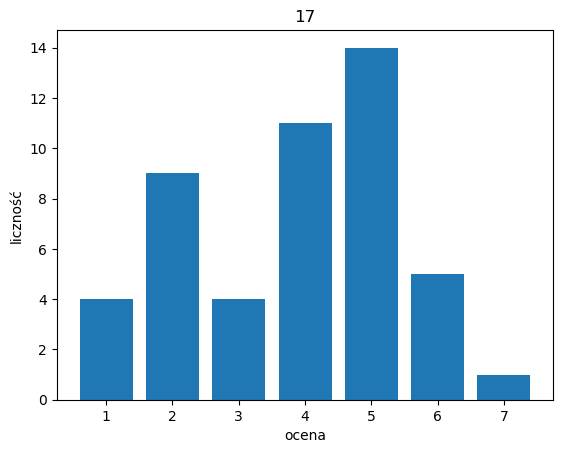

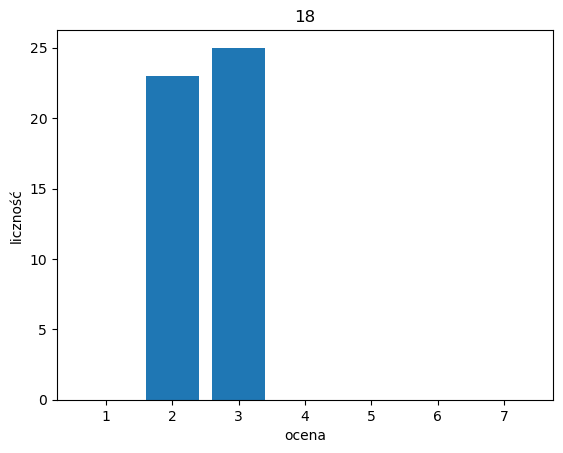

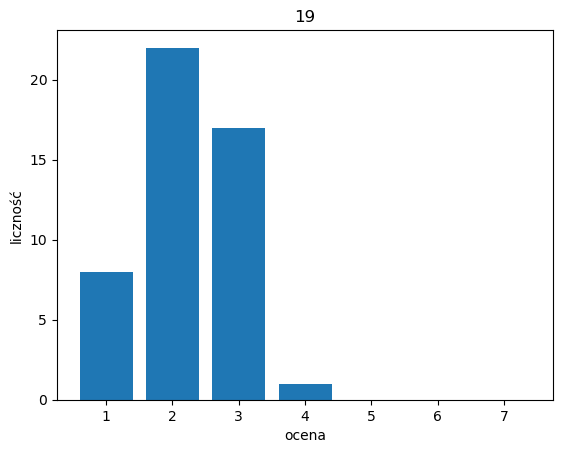

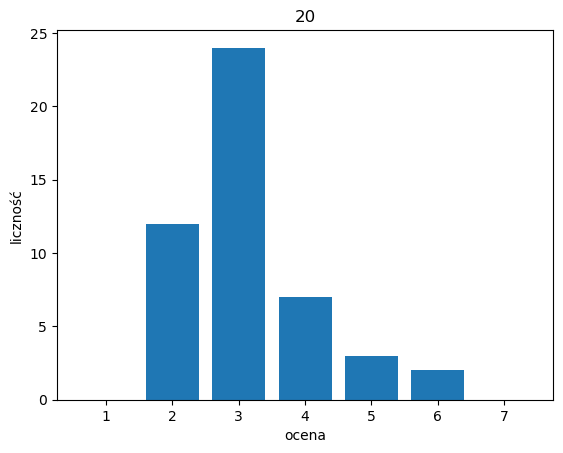

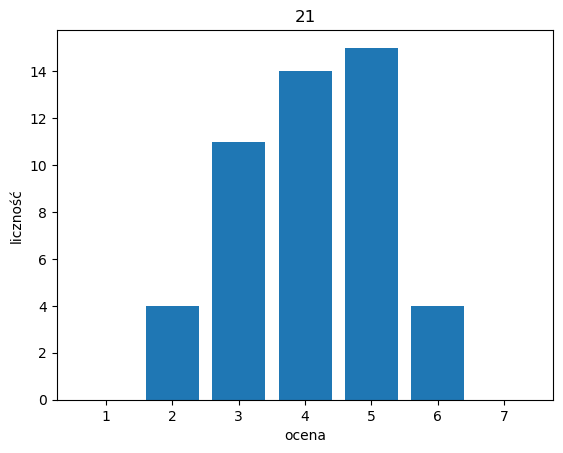

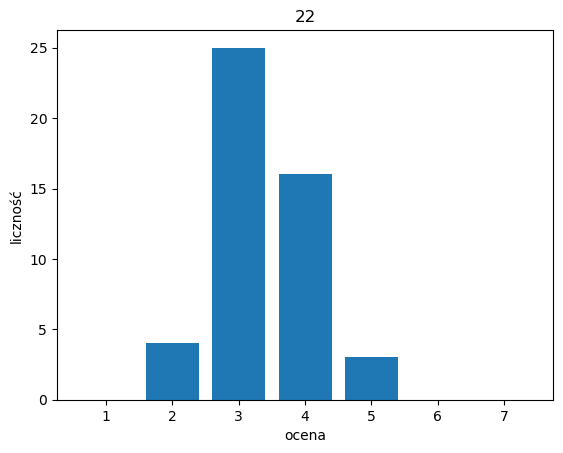

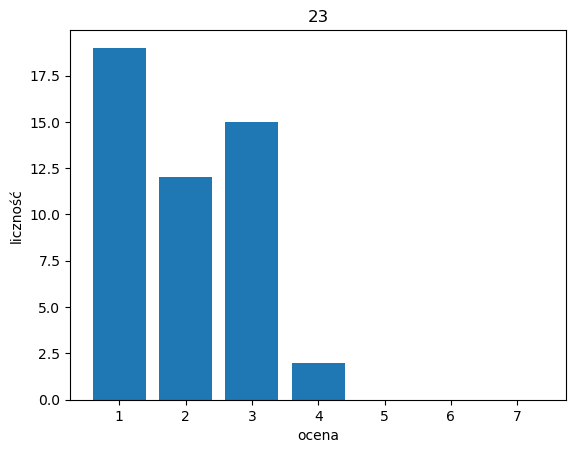

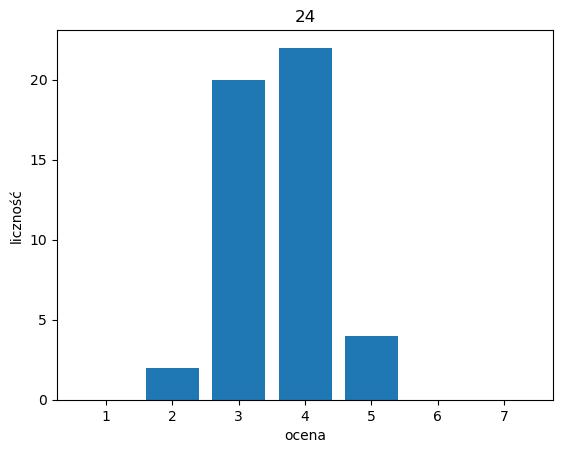

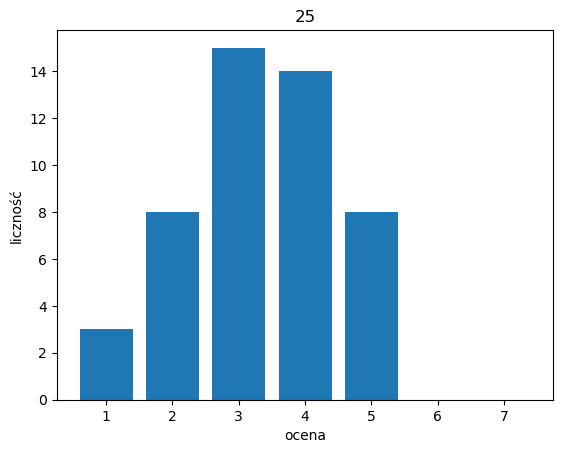

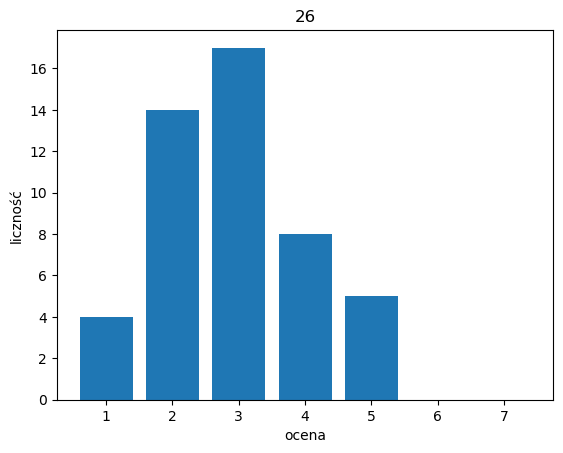

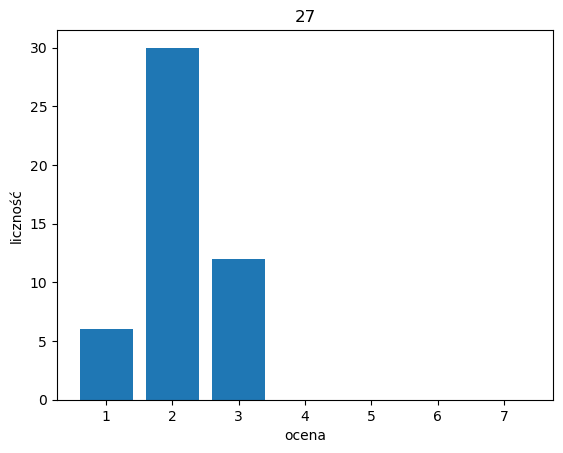

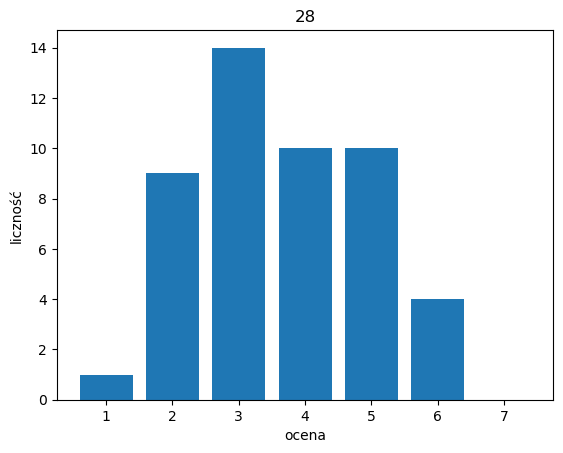

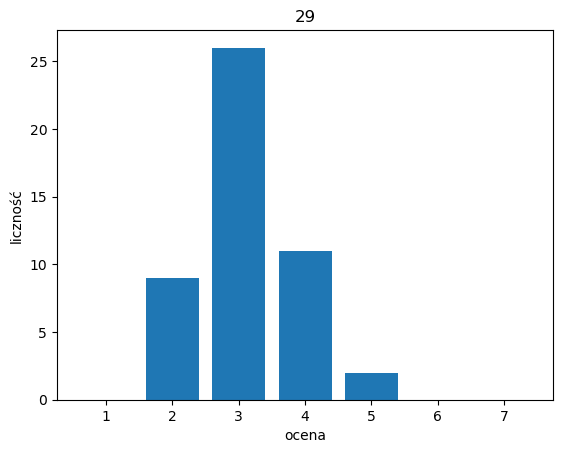

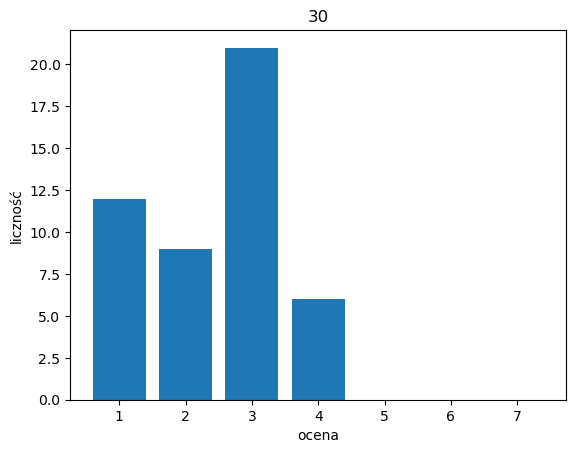

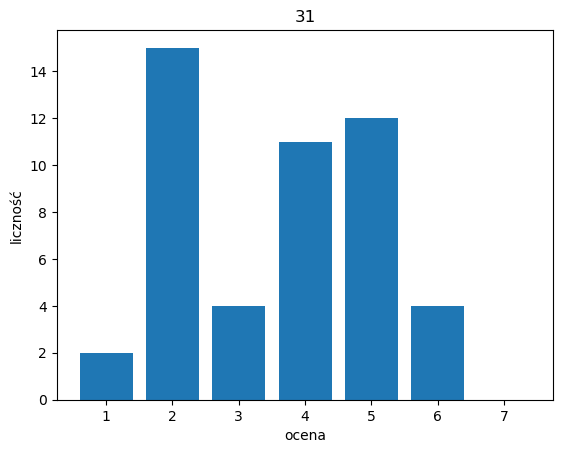

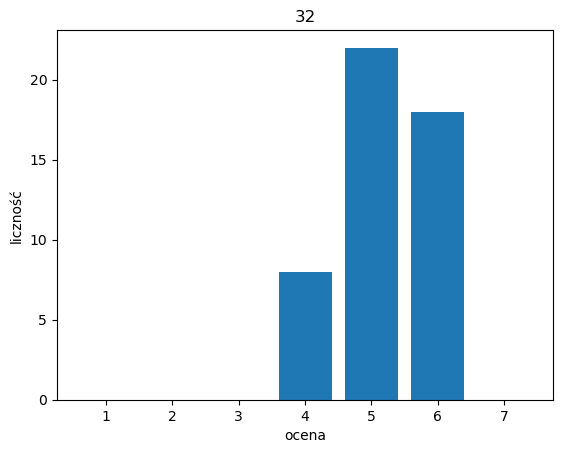

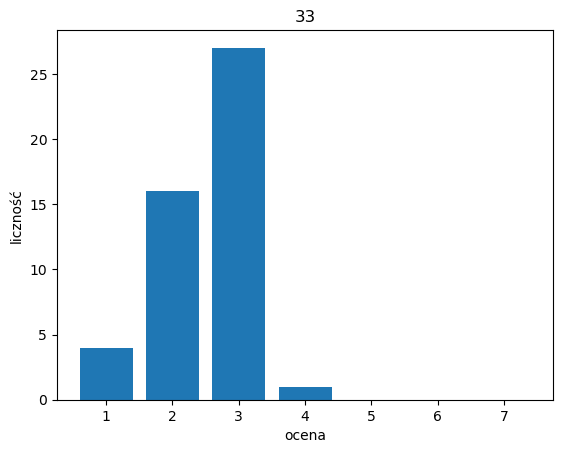

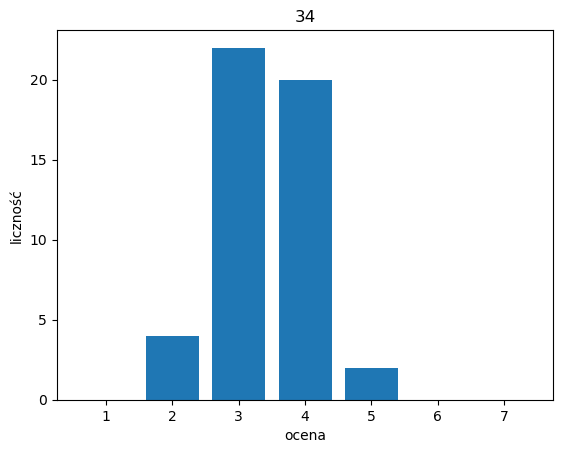

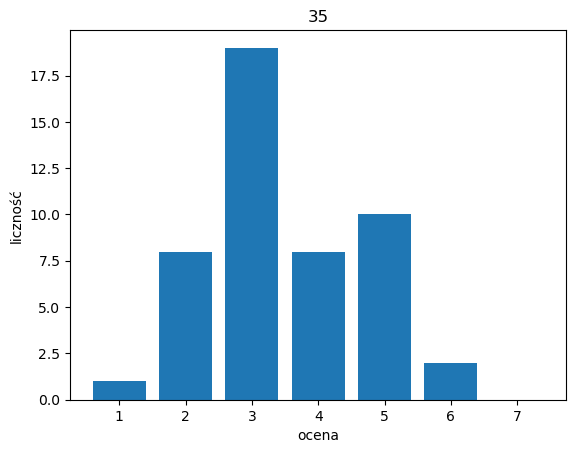

In [345]:
participant_ids = participants['id'].unique()
participants['rmse'] = pd.Series(dtype='float')
for participant in participant_ids:
    group_indexes = data[data['participant_id'] == participant].groupby(['sound', 'channel']).groups.values()
    first_scores = []
    second_scores = []
    for index_pair in group_indexes:
        first_scores.append(data.loc[index_pair[0]]['score'])
        second_scores.append(data.loc[index_pair[1]]['score'])
    rmse = mean_squared_error(first_scores, second_scores, squared=False)
    
    var = statistics.variance(data[data['participant_id'] == participant]['score'])
    participants.loc[participants['id'] == participant, 'rmse'] = rmse
    participants.loc[participants['id'] == participant, 'var'] = var
    score_histogram(data[data['participant_id'] == participant], participant)

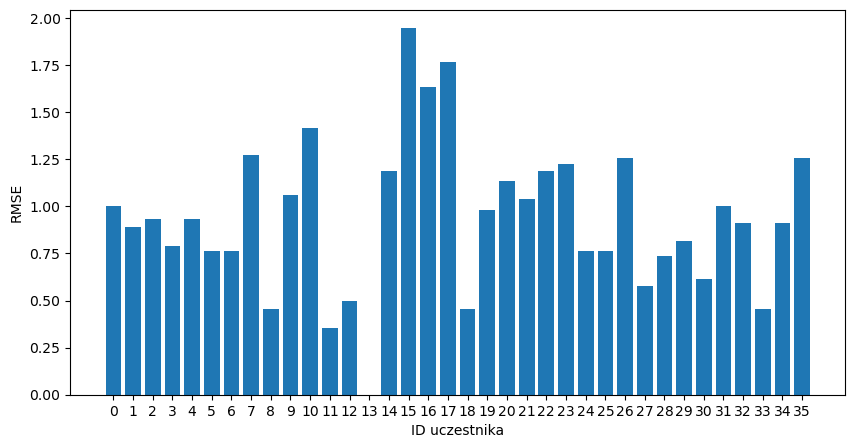

In [347]:
plt.figure(figsize=(10,5))
plt.bar(participant_ids, participants['rmse'])
plt.xticks(participant_ids)
plt.xlabel('ID uczestnika')
plt.ylabel('RMSE')
plt.savefig('rmse.png', dpi=400, format='png')
plt.show()

In [295]:
participants

,id,gender,age,hearing_problems,agreement,start,end,rmse,var
0,0,male,18-25,0,1,16:34:17 11-06-2024,NaN,1.000000,1.120567
1,1,male,18-25,0,1,16:39:59 11-06-2024,NaN,0.889757,0.730053
2,2,male,26-35,0,1,17:15:02 11-06-2024,NaN,0.935414,2.212323
3,3,male,18-25,0,1,17:31:30 11-06-2024,NaN,0.790569,0.857713
4,4,male,18-25,0,1,12:11:05 12-06-2024,NaN,0.935414,1.765514
5,5,male,18-25,0,1,12:52:22 12-06-2024,NaN,0.763763,1.085106
6,6,male,18-25,0,1,13:44:05 12-06-2024,NaN,0.763763,1.359929
7,7,male,18-25,0,1,13:50:48 12-06-2024,NaN,1.274755,1.251330
8,8,female,18-25,0,1,14:28:45 12-06-2024,NaN,0.456435,0.286791
9,9,female,18-25,0,1,10:41:18 17-06-2024,10:45:17 17-06-2024,1.060660,0.829344


In [319]:
valid_participants = participants[(participants['rmse'] < 1.5) & (participants['var'] > 0.6) & (participants['hearing_problems'] == 0)]
print(participants.shape[0])
print(valid_participants.shape[0])
data[data['participant_id'].isin(valid_participants['id'])]

36
19


,participant_id,sound,channel,score,angle
0,0,knocking.wav,3,3,-45°
1,0,knocking.wav,7,4,-135°
2,0,knocking.wav,11,4,135°
3,0,knocking.wav,3,3,-45°
4,0,knocking.wav,9,5,180°
...,...,...,...,...,...
1915,31,glass.wav,9,5,-180°
1916,31,hog.wav,9,6,-180°
1917,31,hog.wav,9,6,-180°
1918,31,knocking.wav,9,6,-180°


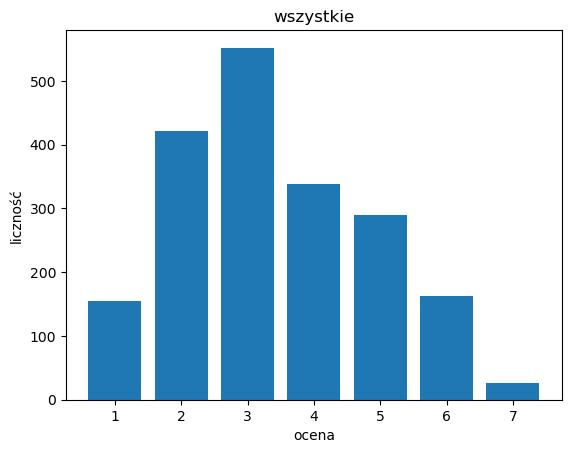

In [321]:
score_histogram(data, 'wszystkie')

In [351]:
channels_to_angles = {
    1: '0°',
    3: '-45°',
    5: '-90°',
    7: '-135°',
    9: '180°',
    11: '135°',
    13: '90°',
    15: '45°'
}
angles = ['-180°', '-135°', '-90°', '-45°', '0°', '45°', '90°', '135°', '180°']

In [353]:
data['angle'] = data['channel'].map(channels_to_angles)

In [355]:
data = pd.concat([data, data[data['channel']==9].assign(angle='-180°')], ignore_index=True)

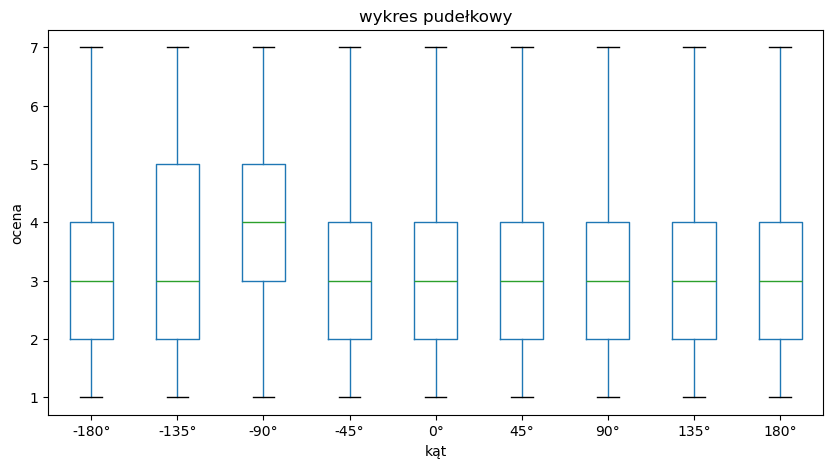

In [357]:
data.groupby('angle').boxplot(subplots=False, column='score', grid=False, figsize=(10,5), positions=[1, 0, 3, 2, 4, 7, 8, 5, 6])
plt.xticks(range(0, len(angles)), angles)
plt.xlabel('kąt')
plt.ylabel('ocena')
plt.title('wykres pudełkowy')
plt.savefig('boxplot.png', dpi=400, format='png')
plt.show()

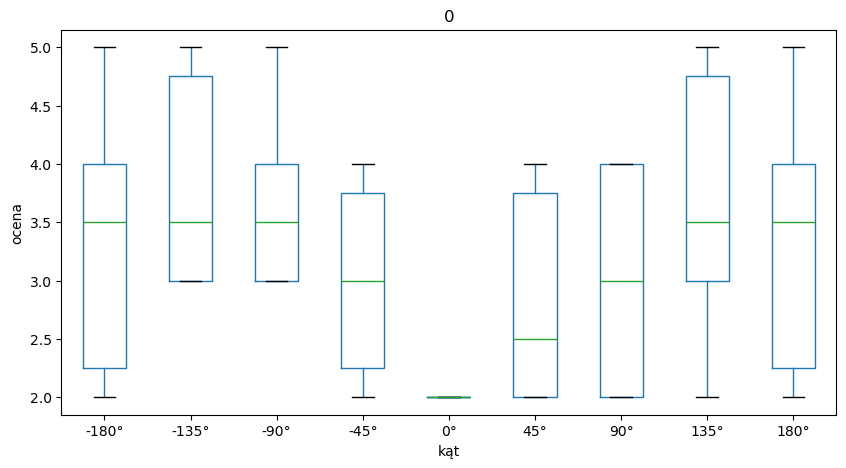

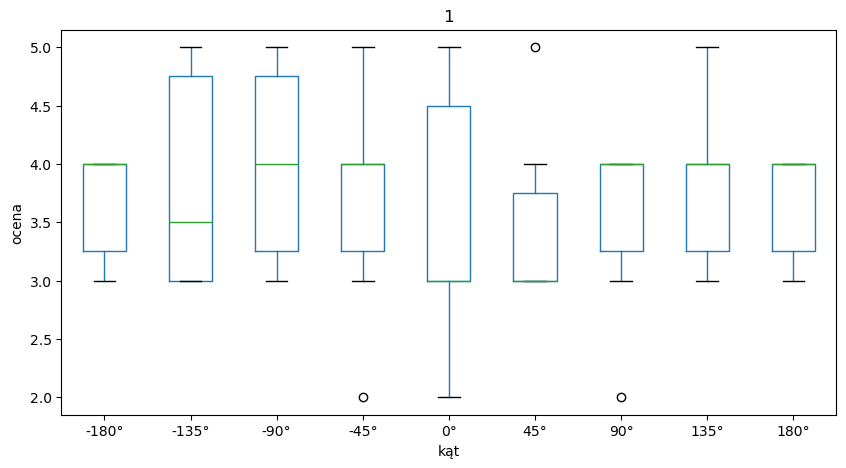

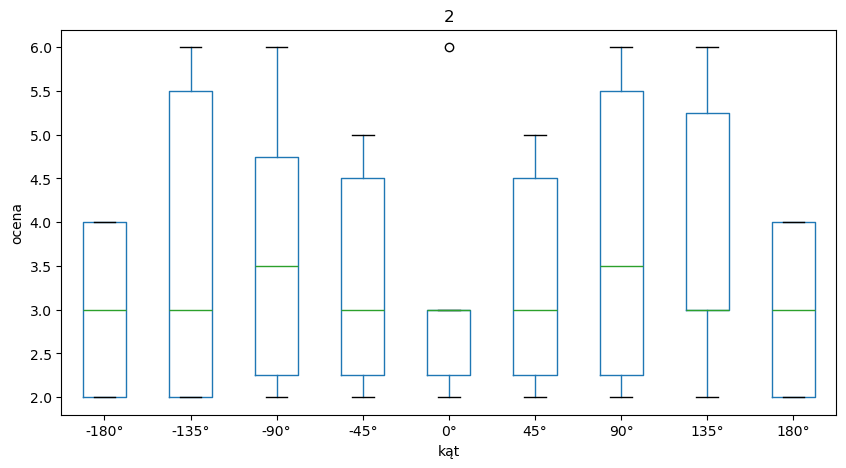

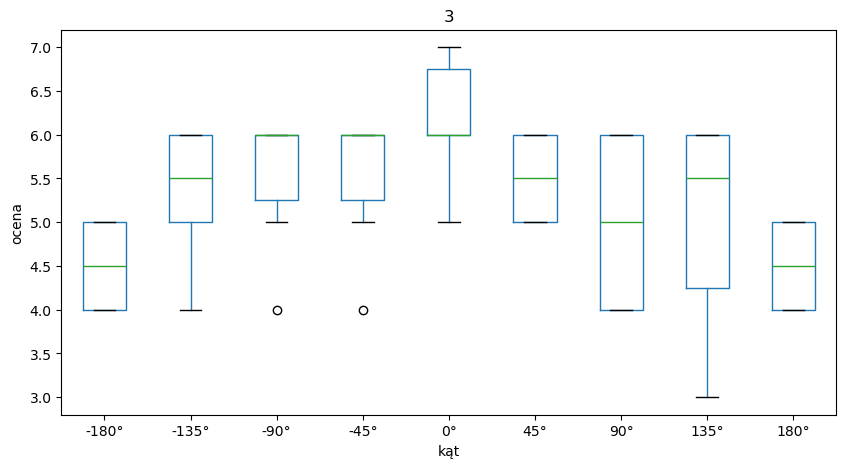

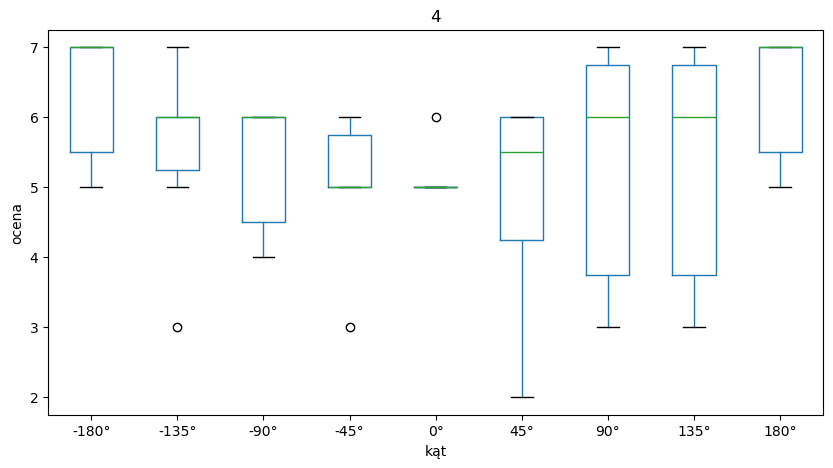

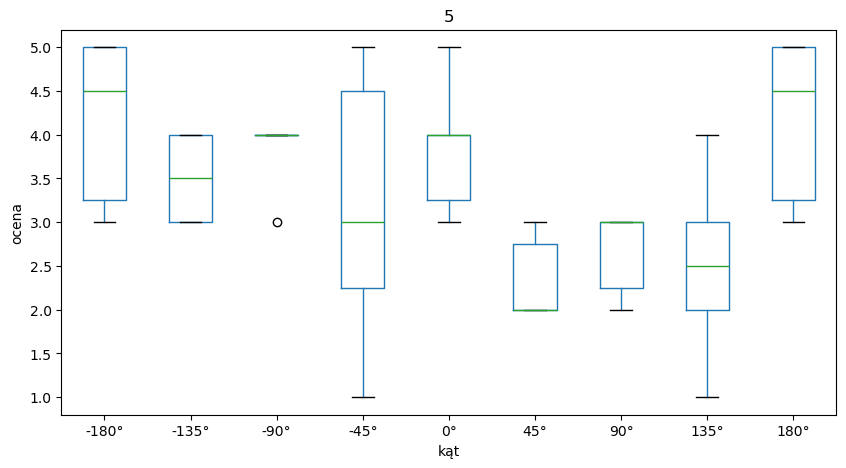

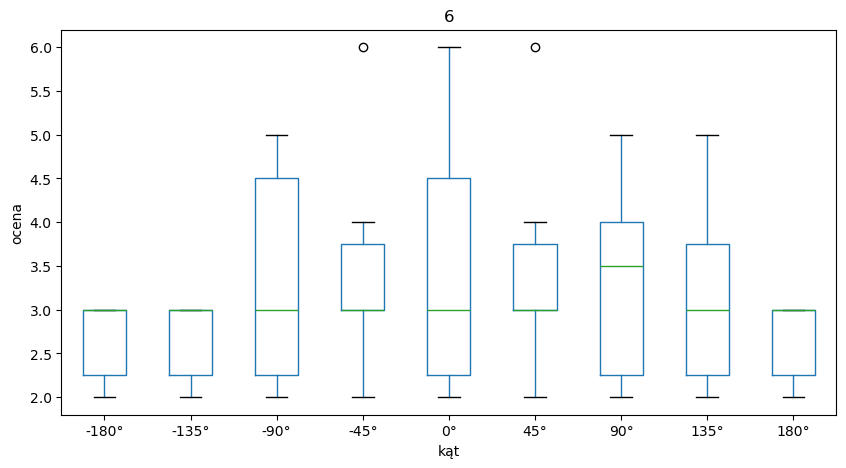

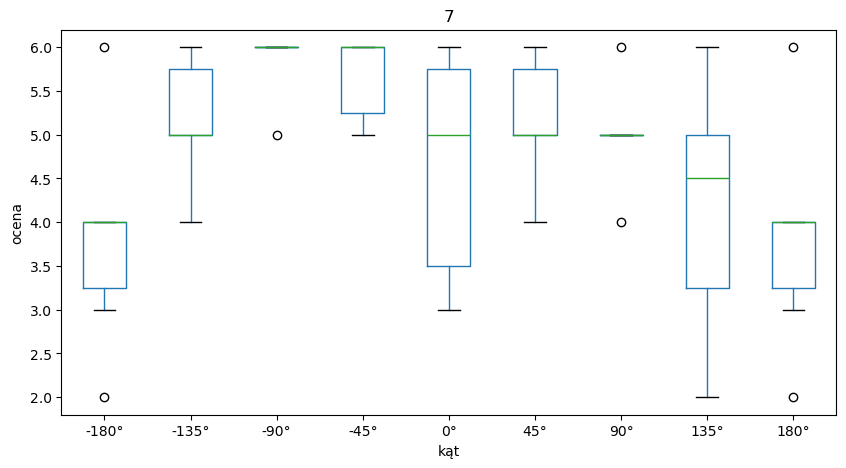

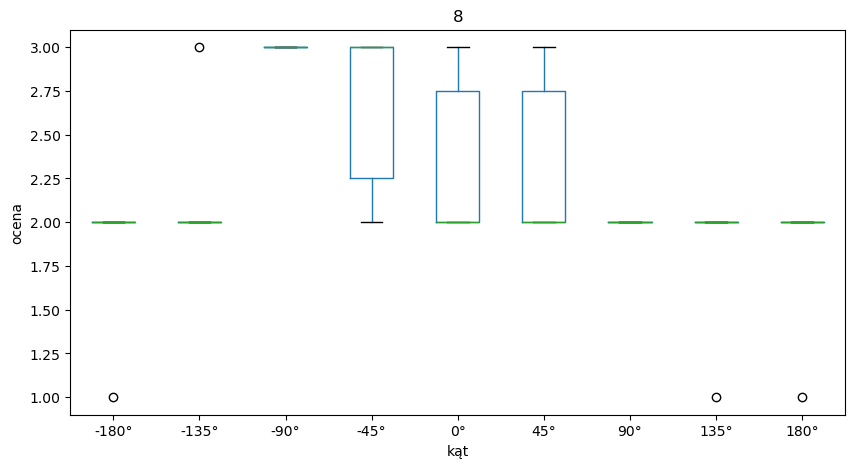

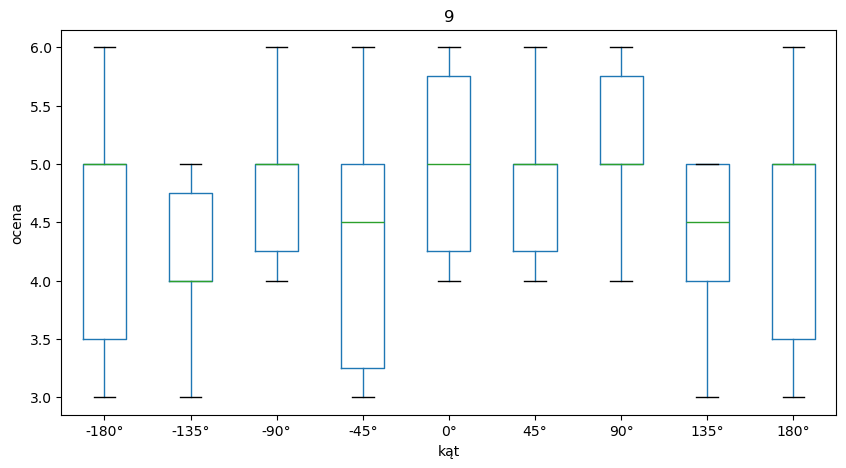

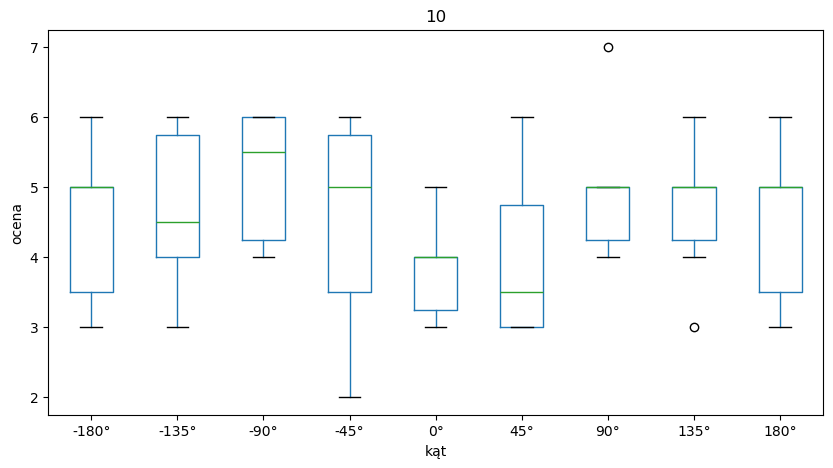

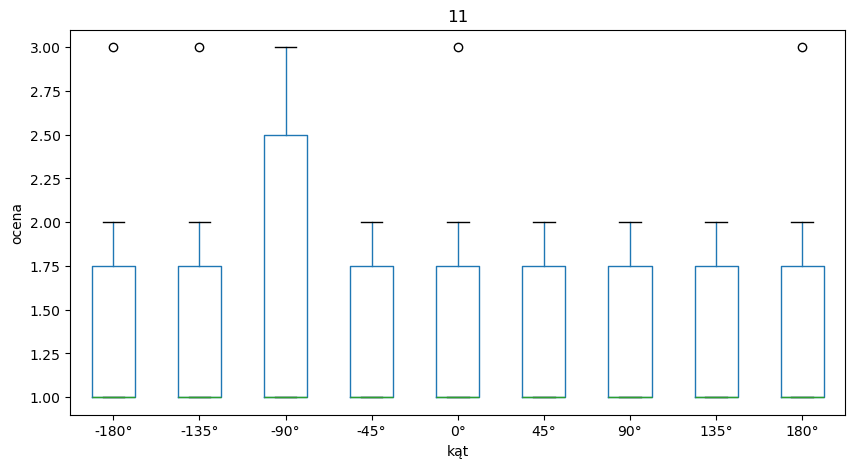

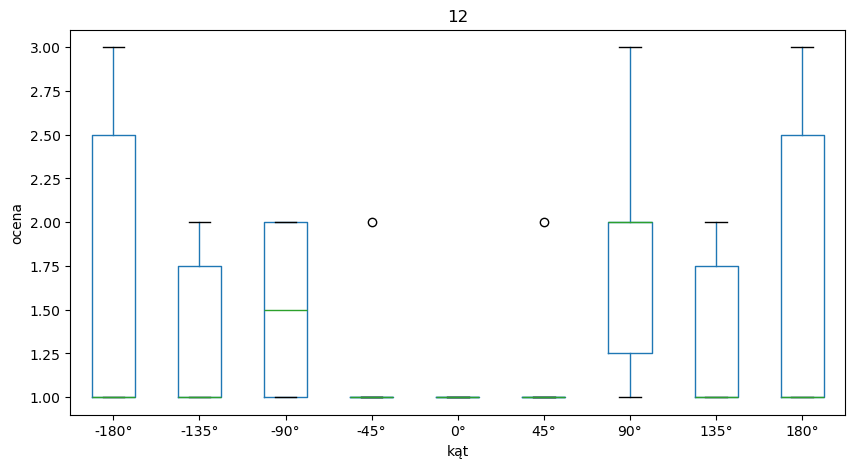

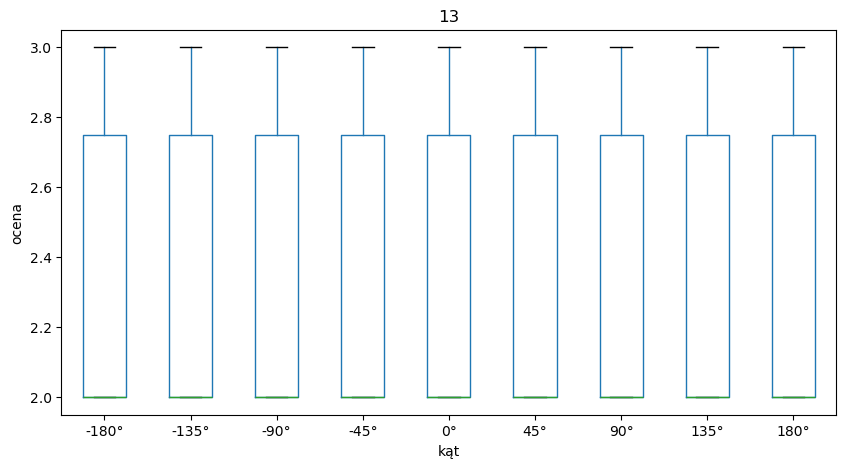

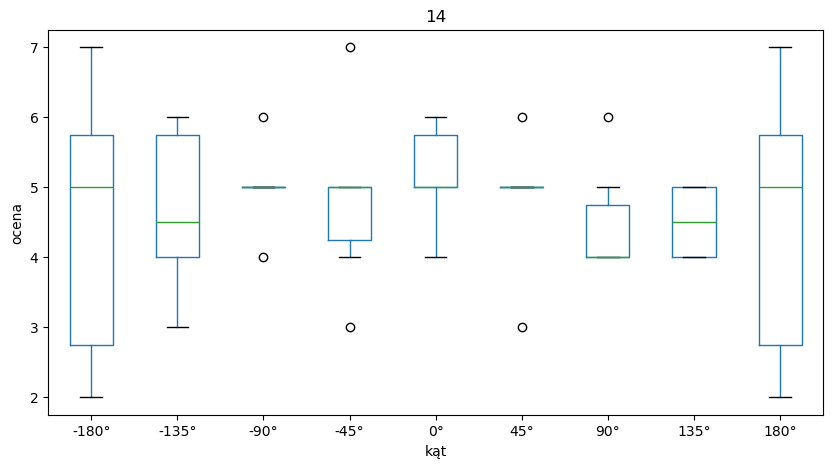

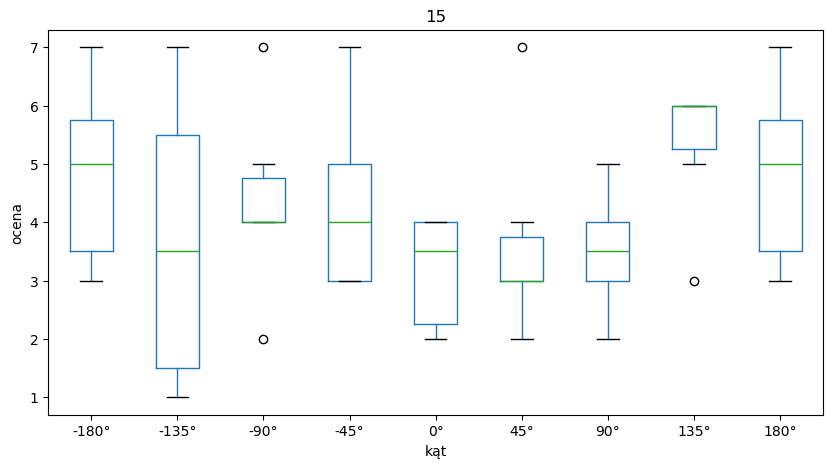

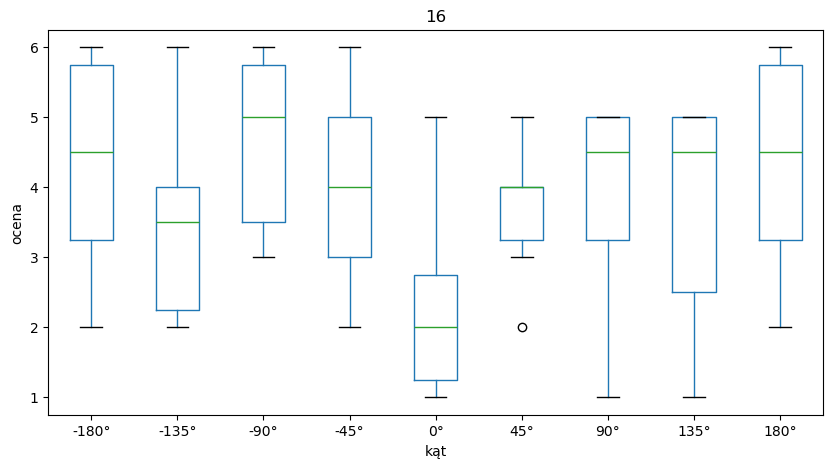

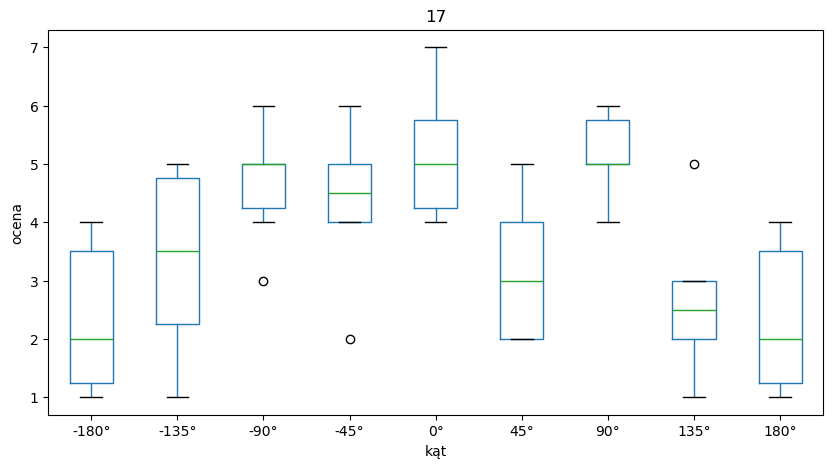

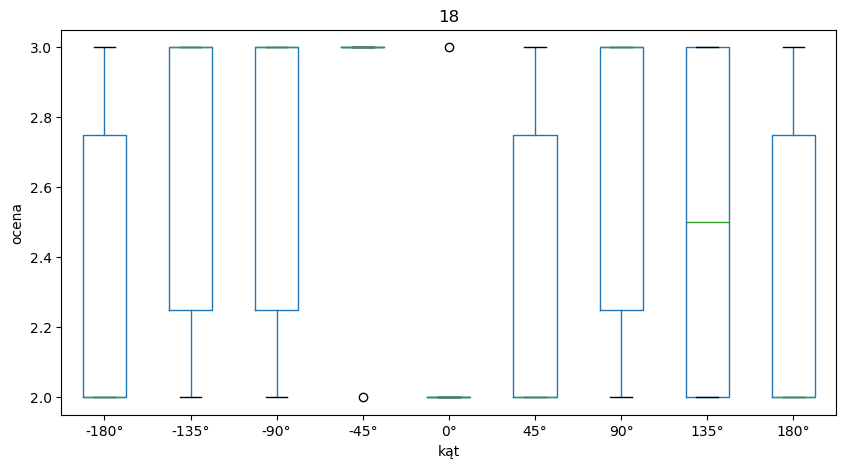

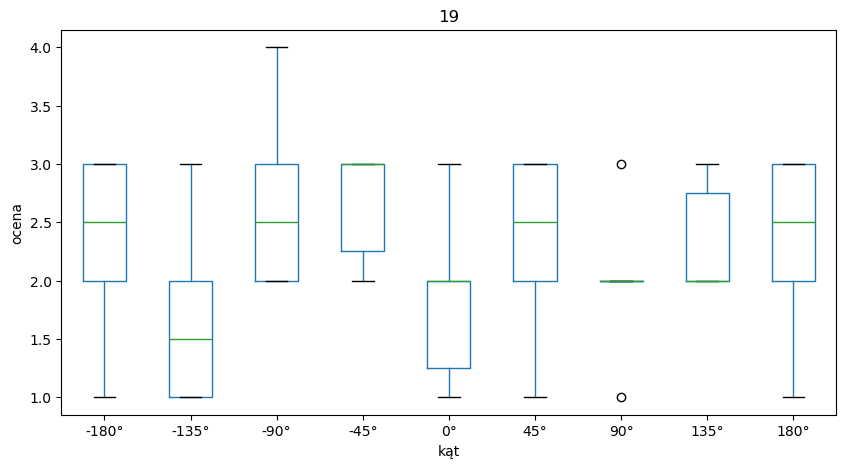

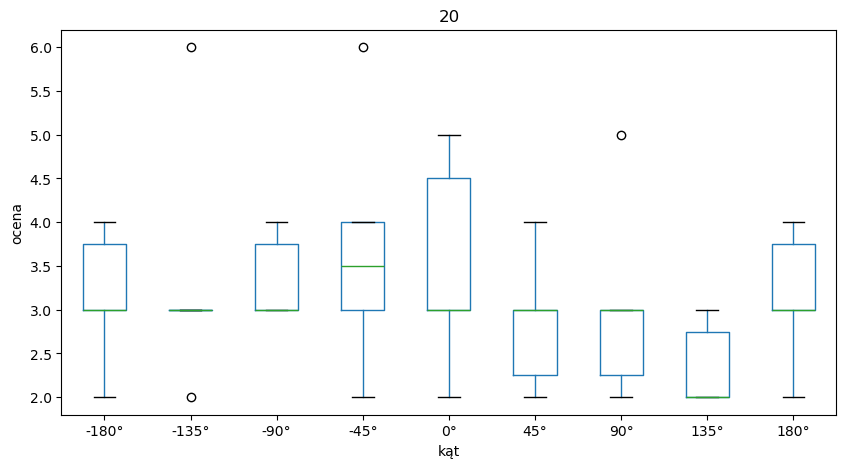

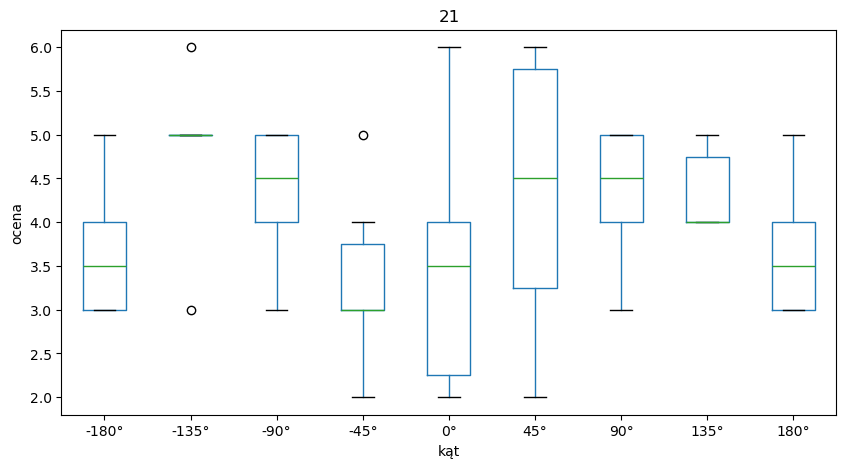

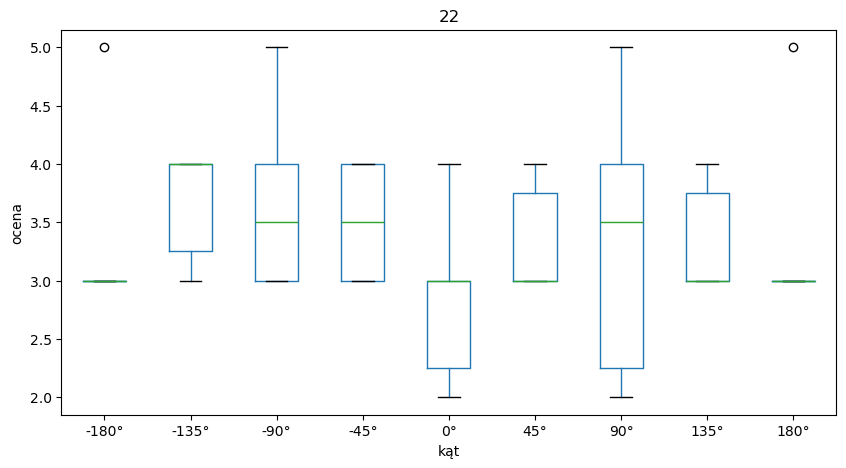

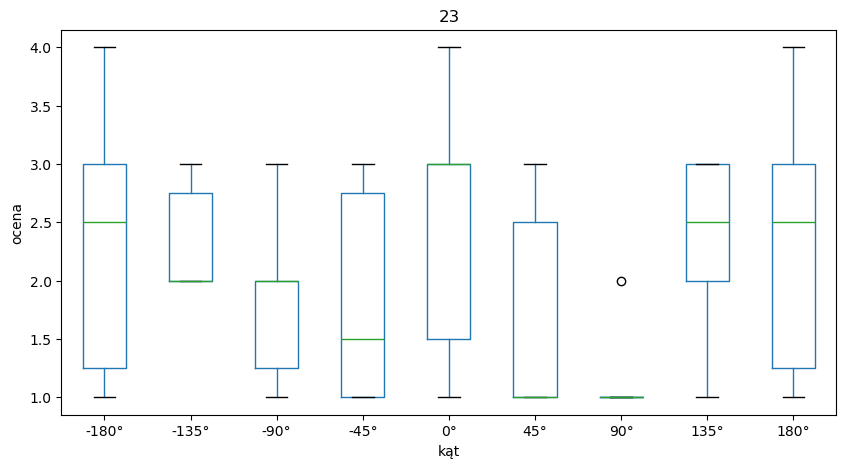

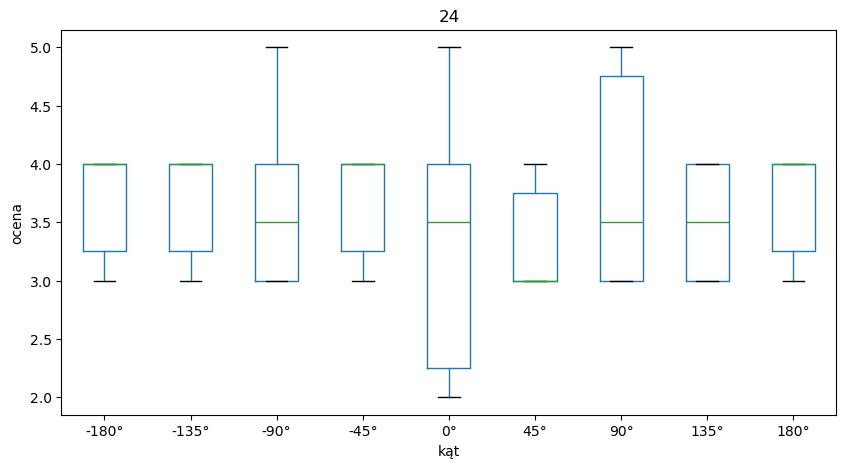

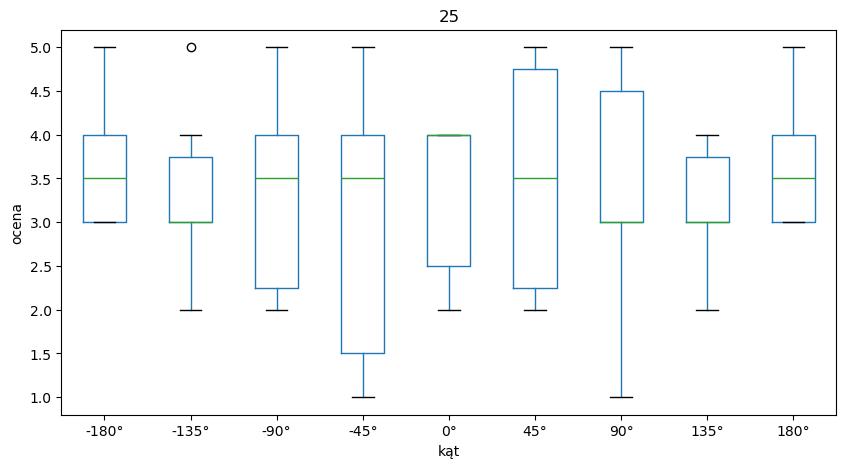

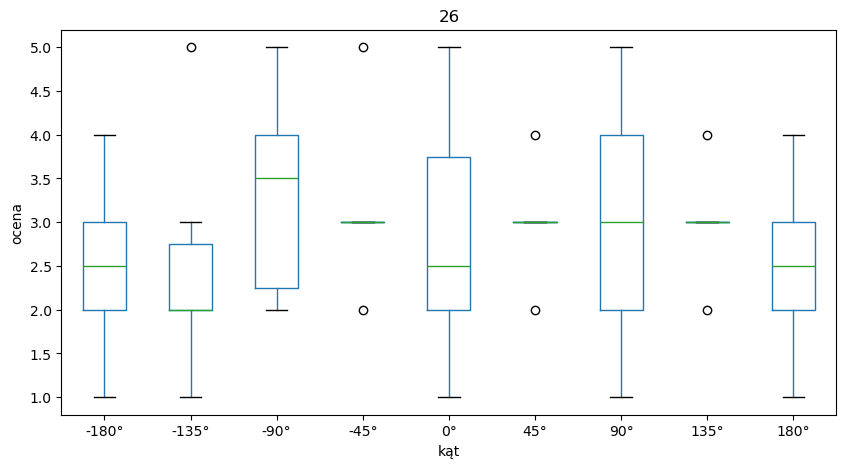

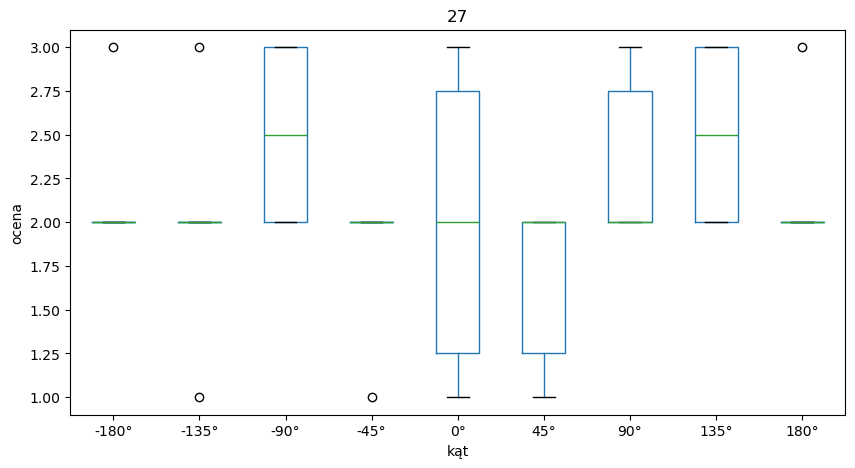

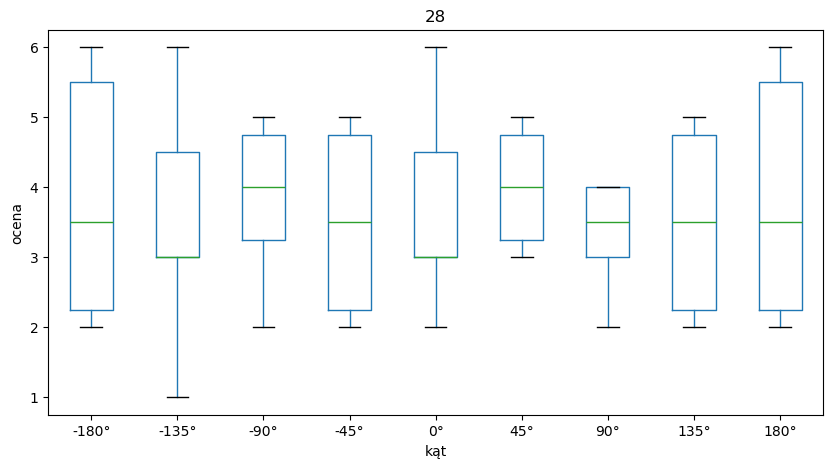

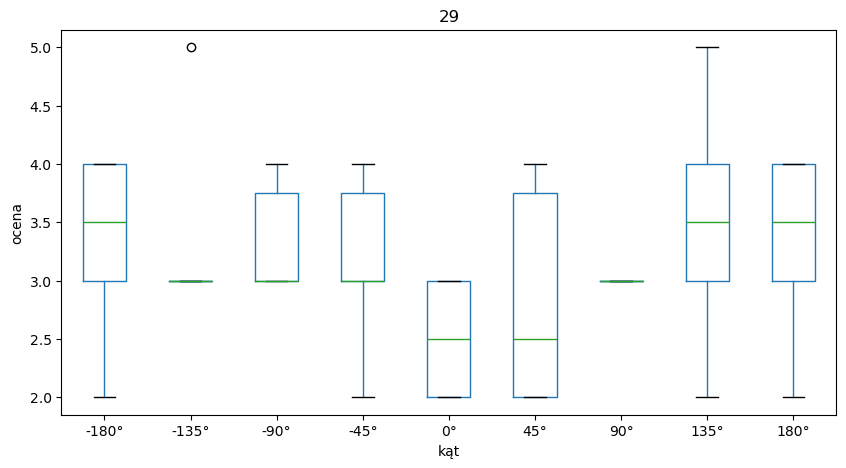

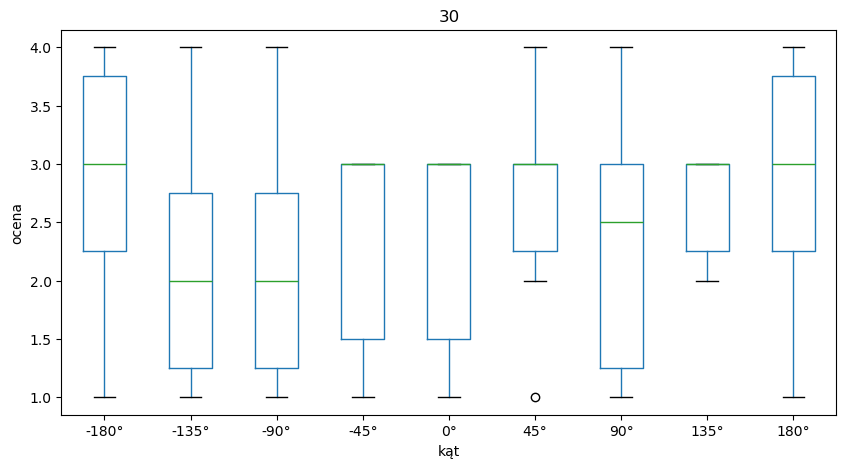

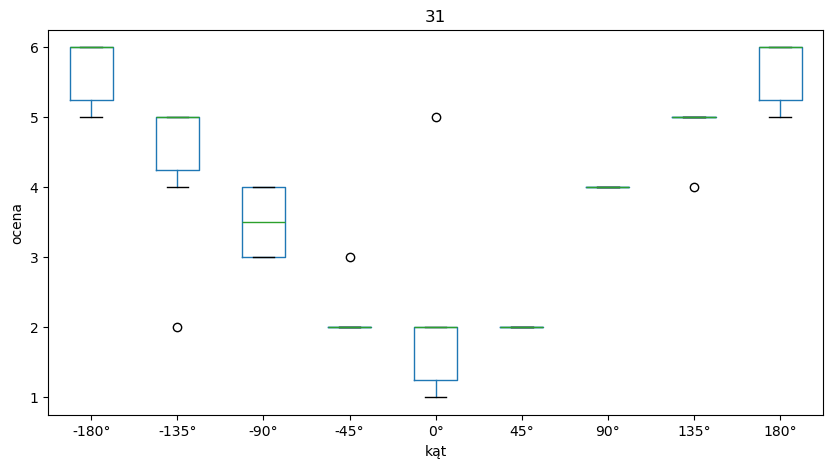

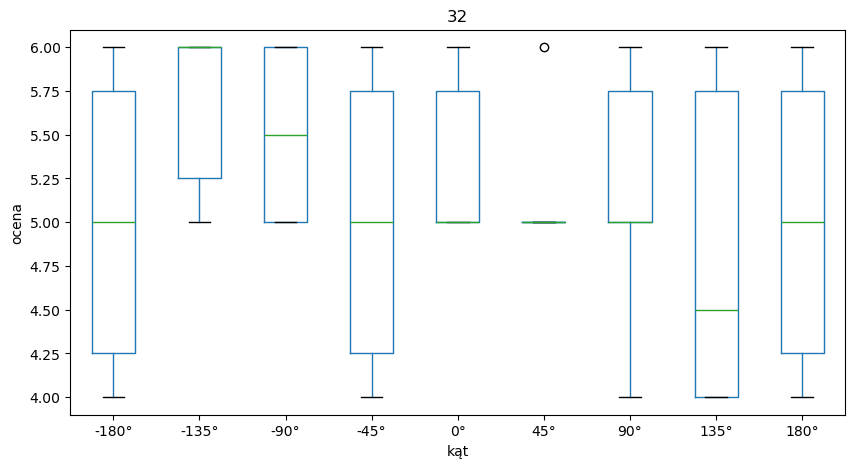

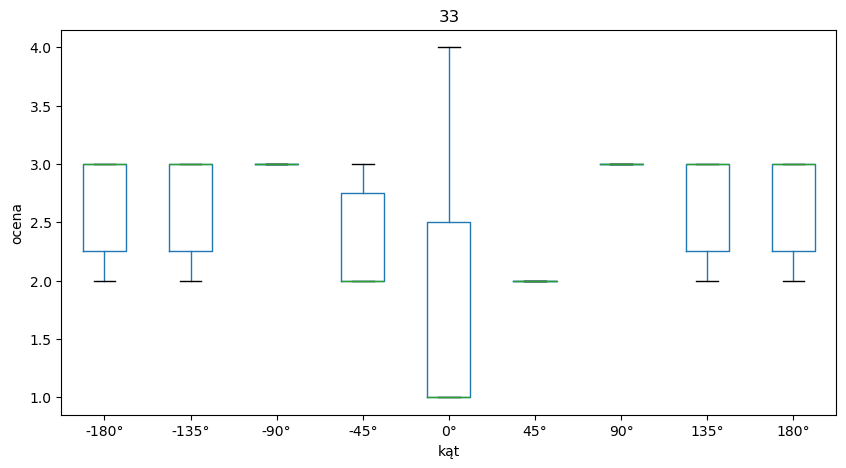

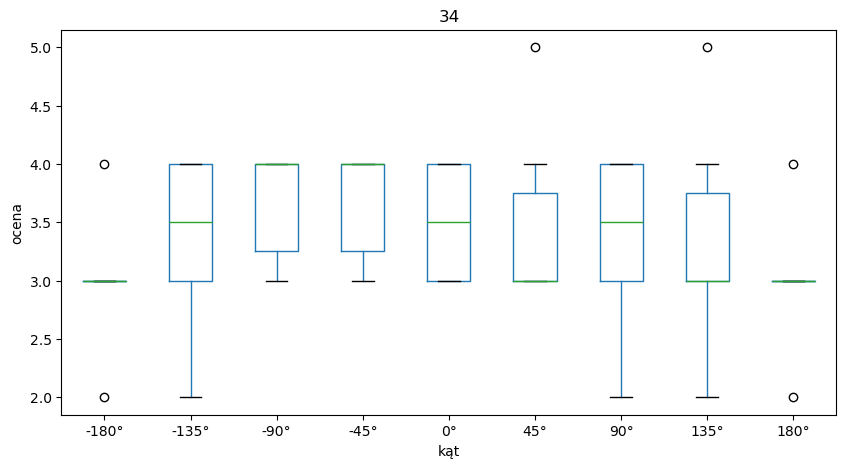

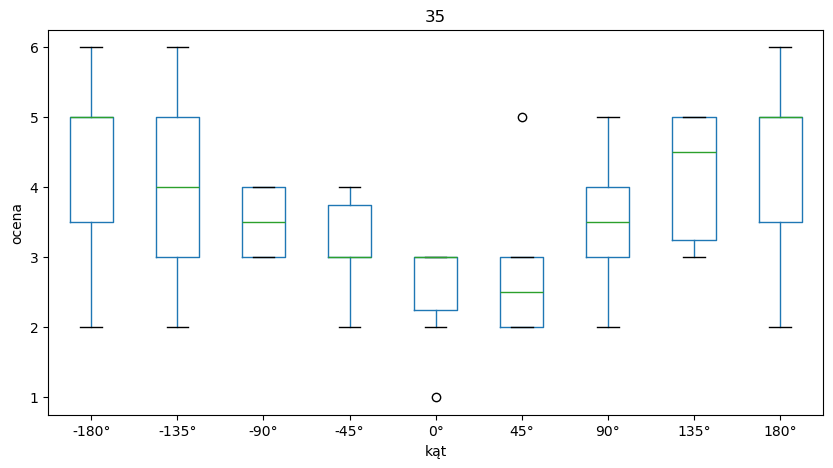

In [369]:
sounds = data['sound'].unique()

for sound in participant_ids:
    data[data['participant_id']==sound].groupby('angle').boxplot(subplots=False, column='score', grid=False, figsize=(10,5), positions=[1, 0, 3, 2, 4, 7, 8, 5, 6])
    plt.xticks(range(0, len(angles)), angles)
    plt.xlabel('kąt')
    plt.ylabel('ocena')
    plt.title(sound)
    plt.savefig('boxplot.png', dpi=400, format='png')
    plt.show()

In [365]:
angle_groups = data.groupby('angle').groups
means = []
intervals1 = []
intervals2 = []
for angle in angles:
    indexes = angle_groups[angle]
    angle_data = data.loc[indexes]
    mean = angle_data['score'].mean()
    intervals = st.norm.interval(0.95, loc=mean, scale=st.sem(angle_data['score']))
    means.append(mean)
    intervals1.append(mean-intervals[0])
    intervals2.append(intervals[1]-mean)

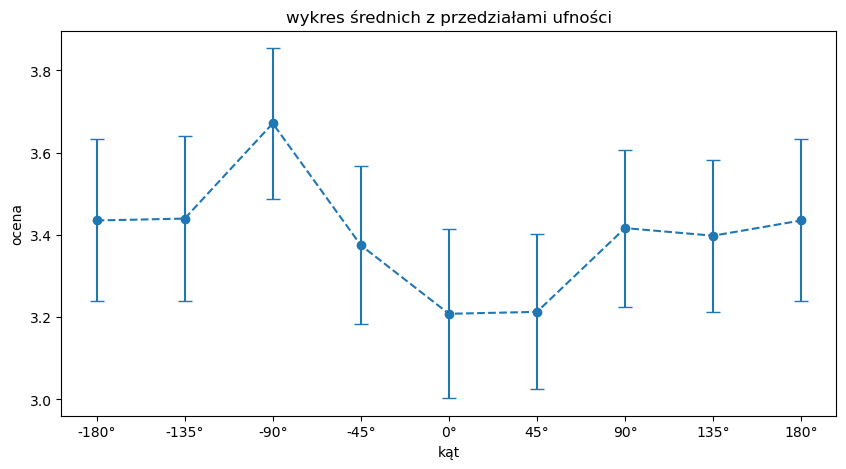

In [367]:
plt.figure(figsize=(10,5))
plt.errorbar(angles, means, [intervals1, intervals2], capsize=5, capthick=1, marker='o', fmt='--')
plt.xlabel('kąt')
plt.ylabel('ocena')
plt.title('wykres średnich z przedziałami ufności')
plt.savefig('means_ci.png', dpi=400, format='png')
plt.show()

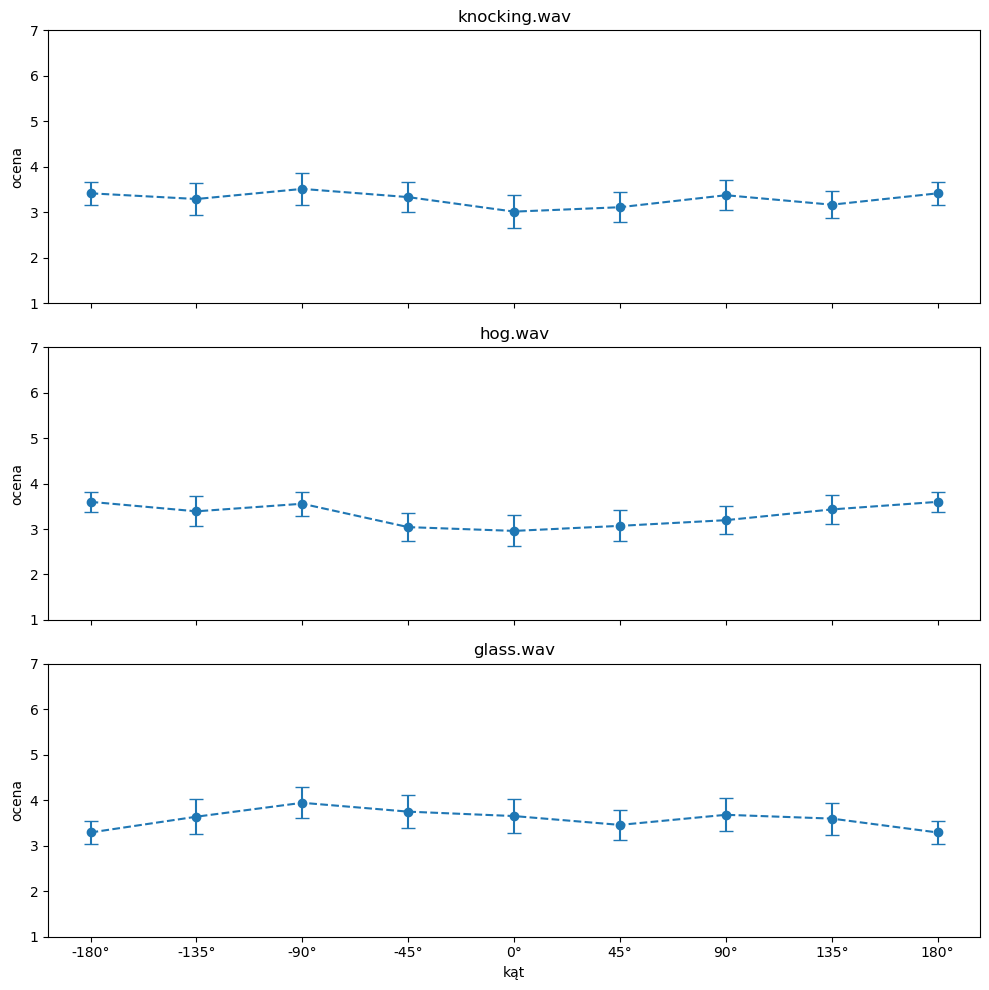

In [335]:
sounds = data['sound'].unique()
fig, ax = plt.subplots(len(sounds), figsize=(10,10), sharex=True)

for i, sound in enumerate(sounds):
    angle_groups = data[data['sound']==sound].groupby('angle').groups
    means = []
    intervals1 = []
    intervals2 = []
    for angle in angles:
        indexes = angle_groups[angle]
        angle_data = data.loc[indexes]
        mean = angle_data['score'].mean()
        intervals = st.t.interval(0.95, len(angle_data)-1, loc=mean, scale=st.sem(angle_data['score']))
        means.append(mean)
        intervals1.append(mean-intervals[0])
        intervals2.append(intervals[1]-mean)
    
    ax[i].errorbar(angles, means, [intervals1, intervals2], capsize=5, capthick=1, marker='o', fmt='--')
    ax[i].set_yticks(range(1,8))
    if i == len(sounds) - 1:
        ax[i].set_xlabel('kąt')
    ax[i].set_ylabel('ocena')
    ax[i].set_title(sound)

plt.tight_layout()
plt.savefig('means_ci_by_sounds.png', dpi=400, format='png')
plt.show()